In [10]:
track = "GSU24AI03-SU24AI21/tracked-url-video"
download = "GSU24AI03-SU24AI21/downloaded-vietnamese-video"
speaker = "GSU24AI03-SU24AI21/detected-speaker-clip"
crop = "GSU24AI03-SU24AI21/cropped-mouth-clip"
vndetect = "GSU24AI03-SU24AI21/detected-vietnamese-clip"
trans = "GSU24AI03-SU24AI21/transcribed-vietnamese-audio"
vnav = "GSU24AI03-SU24AI21/vietnamese-av"
cache_dir = "/Users/minhnguyen/home/vietnamese-av-asr/data/external/vnav/"

In [15]:
import datasets
import os
os.getcwd()
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
"88888" not in "batch_88888.parquet"

False

In [16]:
dataset = datasets.load_dataset(vnav,cache_dir=cache_dir,trust_remote_code=True,name='all')

Generating train split: 2212 examples [00:00, 33175.88 examples/s]
Generating train split: 1769 examples [00:01, 1140.68 examples/s]
Generating validation split: 221 examples [00:00, 1708.86 examples/s]
Generating test split: 222 examples [00:00, 1791.03 examples/s]


In [ ]:
vocabs_ = Counter()
len_ = Counter()
transcripts = []
transcript_splits =[]
for _split in dataset:
    transcripts.extend(dataset[_split]['transcript'])
for transcript in transcripts:
    transcript_splits.append(transcript.split(' '))
    len_.update([len(transcript_splits[-1])])
    vocabs_.update(transcript_splits[-1])
total_words = sum(vocabs_.values())
total_words

In [ ]:
for k in sorted(len_):
    print(f"{k}: {len_[k]}")

In [18]:
common_vocabs_ = []
total_common_words = 0
for vocab in sorted(vocabs_,key=lambda k: vocabs_[k],reverse=True):
    if total_common_words <= 0.8 * total_words:
        common_vocabs_.append(vocab)
        total_common_words += vocabs_[vocab]
total_common_words,len(common_vocabs_)

(22535, 440)

Text(0, 0.5, 'Count(%)')

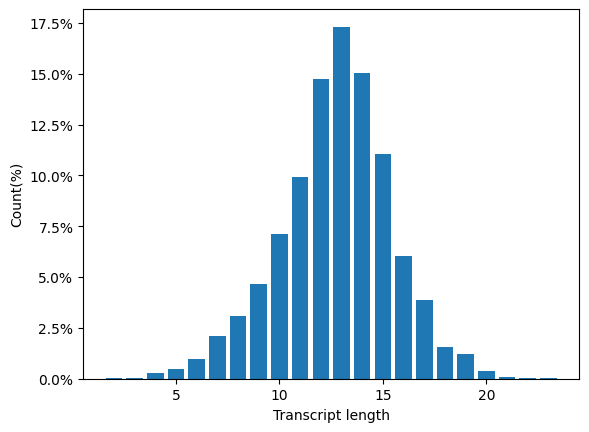

In [156]:
lengths = list(len_.keys())
counts = np.array(list(len_.values()))
plt.bar(lengths,height=counts/np.sum(counts),align='center')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Transcript length")
plt.ylabel("Count(%)")

In [151]:

n_common_text = 0
for transcript_split in transcript_splits:
    n_common_word = 0
    for _word in transcript_split:
        if _word in common_vocabs_:
            n_common_word += 1
    if n_common_word / len(transcript_split) >= 0.7:
        n_common_text += 1
n_common_text

1695